<a href="https://colab.research.google.com/github/tseth92/NeuralNet_Square/blob/master/neural_network_square.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''Training a neural network to predict the square of a number'''
import numpy as np
import matplotlib.pyplot as pp
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense
from IPython.display import Audio, display

Using TensorFlow backend.


In [0]:
'''configurations for neural net'''
# change these values to experiment
n_samples = 100000   # number of samples between 0 and mid_range
epochs = 100         # number of times the full data trains the network params
batch_size = 1000    # the amount of data which goes into the network at once
mid_range_train = 10 # range within which data is required
mid_range_test = 20  # range outside of trained dataset. -10 to +10
num_neurons = 10     # number of neurons required in middle layer

In [0]:
'''creates random samples of n_samples rows which are between 0 to 1.
mid_range decides the range under which the samples will be created.'''
def get_data(n_samples, mid_range):
  X = np.random.random((n_samples,1))*mid_range-(mid_range/2)
  # eg. if n_samples = 10000, mid_range = 10 then it will create samples b/w 
  # 0 and 5 positive and negative
  y = X*X
  #print(X)
  return X,y

In [0]:
''' creating the neural net model of 1:20:1; relu activation, mse as loss and 
adam optimizer'''
def get_model():
  model = Sequential()
  model.add(Dense(num_neurons, input_shape=(1,), activation='relu'))
  model.add(Dense(1))
  print(model.summary())
  model.compile(loss='mse', optimizer='adam')
  return model
  

In [0]:
''' train the model for specified number of epochs, batch_size'''
def train_model(X, y, model, epochs, batch_size):
  h = model.fit(X, y, validation_split=0.2,
               epochs=epochs,
               batch_size=batch_size,
               verbose=0)
  pp.figure(figsize=(15,2.5))
  pp.plot(h.history['loss'])
  pp.title('Training loss wrt time')
  return model

In [0]:
''' predict the model for X(training data) and or X2 which is outside 
the training dataset'''
def predict_model(X, X2):
  pred = model.predict(X)
  
  pred2 = model.predict(X2)
  
  # uncomment below code to observe the expected and actual values
  # in the form (inputData, expectedOutputData, predictedOutputData, difference)
  
  #for i,j in zip(X, pred):
  #  print(i,i*i,j, j-(i*i))
  pp.figure(figsize=(10,3))
  pp.plot(X,pred, '.')
  pp.xlabel('x')
  pp.ylabel('prediction')
  pp.title('Prediction within training sample space')
  
  pp.figure(figsize=(10,3))
  pp.plot(X2,pred2, '.')
  pp.xlabel('x')
  pp.ylabel('prediction')
  pp.title('Prediction outside training sample space')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None


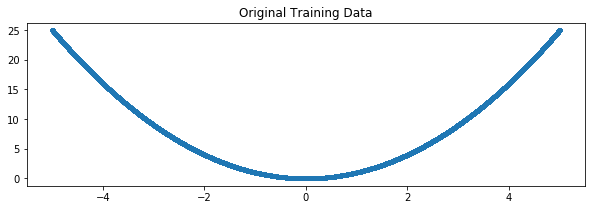

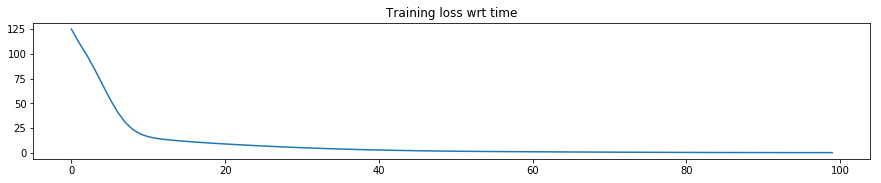

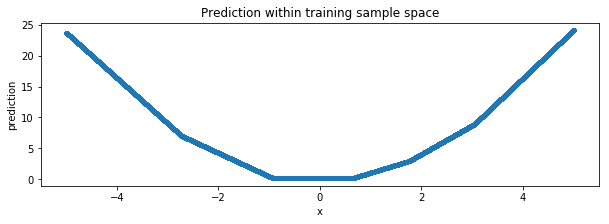

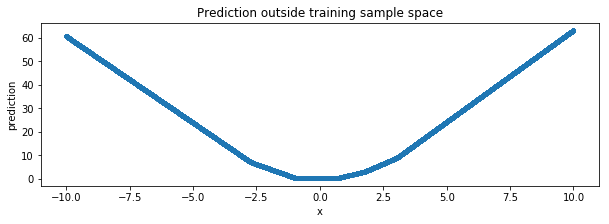

In [8]:
if __name__ == '__main__' :
  X_train,y_train = get_data(n_samples, mid_range_train)
  X_test,y_test = get_data(n_samples, mid_range_test)
  model = get_model()
  pp.figure(figsize=(10,3))
  pp.plot(X_train, y_train,'.')
  pp.title('Original Training Data')
  model = train_model(X_train, y_train, model, epochs, batch_size)
  predict_model(X_train, X_test)
  # below is audio which will fireup(literally :D) when the training and 
  #prediction completes
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/ \
                original/woo_vu_luvub_dub_dub.wav', autoplay=True))